The best parameters for the models were as follows:
MCF/DropSeq: 'Neural Network': {'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.1}
HCC/DropSeq: Ensemble: of Logistic Regression, SVM, and Random Forest with their best parameters:
'Logistic Regression': {'C': 0.1, 'penalty': 'l2'}, 'Random Forest': {'max_depth': 100, 'n_estimators': 200}, 'SVM': {'C': 10, 'kernel': 'rbf'}
MCF/SmartSeq: 'Random Forest': {'max_depth': 10, 'n_estimators': 50}
HCC/SmartSeq: 'Random Forest': {'max_depth': 10, 'n_estimators': 50}

models = {'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier(random_state=42),
          'SVM': SVC(probability=True, random_state=42),
          'Neural Network': MLPClassifier(random_state=42, batch_size='auto', max_iter=1000000, solver='sgd')
          }


In [18]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [19]:
#laptop
MCF_DS = pd.read_csv("C:\\Users\\camer\\Desktop\\class stuff\\Semester 4\\ai lab\\DropSeq\\MCF7_Filtered_Normalised_3000_Data_train.txt", delimiter="\ ", engine='python', index_col=0)

In [20]:
MCF_DS

,"""AAAAACCTATCG_Normoxia""","""AAAACAACCCTA_Normoxia""","""AAAACACTCTCA_Normoxia""","""AAAACCAGGCAC_Normoxia""","""AAAACCTAGCTC_Normoxia""","""AAAACCTCCGGG_Normoxia""","""AAAACTCGTTGC_Normoxia""","""AAAAGAGCTCTC_Normoxia""","""AAAAGCTAGGCG_Normoxia""","""AAAATCGCATTT_Normoxia""",...,"""TTTTACAGGATC_Hypoxia""","""TTTTACCACGTA_Hypoxia""","""TTTTATGCTACG_Hypoxia""","""TTTTCCAGACGC_Hypoxia""","""TTTTCGCGCTCG_Hypoxia""","""TTTTCGCGTAGA_Hypoxia""","""TTTTCGTCCGCT_Hypoxia""","""TTTTCTCCGGCT_Hypoxia""","""TTTTGTTCAAAG_Hypoxia""","""TTTTTTGTATGT_Hypoxia"""
"""MALAT1""",1,3,3,6,4,5,1,13,3,3,...,0,2,1,0,1,0,1,0,0,4
"""MT-RNR2""",0,0,0,2,0,0,2,1,7,0,...,0,0,0,0,0,0,0,0,0,0
"""NEAT1""",0,0,0,0,0,2,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
"""H1-5""",0,0,0,0,0,2,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
"""TFF1""",4,1,1,1,0,0,0,2,0,1,...,2,3,8,0,0,3,4,2,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""BRWD1-AS2""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""RPS19BP1""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""AUNIP""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""TNK2""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#testing daata
MCF_DS_test = pd.read_csv("C:\\Users\\camer\\Desktop\\class stuff\\Semester 4\\ai lab\\DropSeq\\MCF7_Filtered_Normalised_3000_Data_test_anonim.txt", delimiter="\ ", engine='python', index_col=0)

In [22]:
def oxia(df):
    new_row = {col: None for col in df.columns}
    for col in df.columns:
        if '_Nor' in col:
            new_row[col] = 1
        elif '_Hyp' in col:
            new_row[col] = 0
    return pd.DataFrame(new_row, index=['oxia'])


In [23]:
#Oxia them and split them into X and y
y_MCF_DS = oxia(MCF_DS).T

In [24]:
y_MCF_DS

,oxia
"""AAAAACCTATCG_Normoxia""",1
"""AAAACAACCCTA_Normoxia""",1
"""AAAACACTCTCA_Normoxia""",1
"""AAAACCAGGCAC_Normoxia""",1
"""AAAACCTAGCTC_Normoxia""",1
...,...
"""TTTTCGCGTAGA_Hypoxia""",0
"""TTTTCGTCCGCT_Hypoxia""",0
"""TTTTCTCCGGCT_Hypoxia""",0
"""TTTTGTTCAAAG_Hypoxia""",0


In [25]:
MCF_DS = MCF_DS.T

In [26]:
MCF_DS_test = MCF_DS_test.T
MCF_DS_test

,"""MALAT1""","""MT-RNR2""","""NEAT1""","""H1-5""","""TFF1""","""MT-RNR1""","""H4C3""","""GDF15""","""KRT81""","""MT-CO3""",...,"""MROH1""","""SKIDA1""","""MICALL1""","""RARG""","""MYO1F""","""BRWD1-AS2""","""RPS19BP1""","""AUNIP""","""TNK2""","""SUDS3"""
"""1""",0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""2""",0,2,0,0,5,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""3""",3,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""4""",0,0,0,0,3,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""5""",1,0,0,0,3,0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""5402""",0,0,0,0,3,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""5403""",0,0,0,0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
"""5404""",1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"""5405""",5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [27]:
MCF_DS

,"""MALAT1""","""MT-RNR2""","""NEAT1""","""H1-5""","""TFF1""","""MT-RNR1""","""H4C3""","""GDF15""","""KRT81""","""MT-CO3""",...,"""MROH1""","""SKIDA1""","""MICALL1""","""RARG""","""MYO1F""","""BRWD1-AS2""","""RPS19BP1""","""AUNIP""","""TNK2""","""SUDS3"""
"""AAAAACCTATCG_Normoxia""",1,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""AAAACAACCCTA_Normoxia""",3,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""AAAACACTCTCA_Normoxia""",3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""AAAACCAGGCAC_Normoxia""",6,2,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""AAAACCTAGCTC_Normoxia""",4,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""TTTTCGCGTAGA_Hypoxia""",0,0,0,0,3,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""TTTTCGTCCGCT_Hypoxia""",1,0,0,0,4,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
"""TTTTCTCCGGCT_Hypoxia""",0,0,0,1,2,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"""TTTTGTTCAAAG_Hypoxia""",0,0,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#{'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.1},
#           'Neural Network': MLPClassifier(random_state=42, batch_size='auto', max_iter=1000000, solver='sgd')

#MCF/DropSeq
mlp = MLPClassifier(hidden_layer_sizes=(50, 50), learning_rate_init=0.1, random_state=42, batch_size='auto', max_iter=1000000, solver='sgd')
mlp.fit(MCF_DS, y_MCF_DS)
y_pred = mlp.predict(MCF_DS_test)

C:\Users\camer\PycharmProjects\AI-Lab\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
y_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [30]:
#check none are missing
np.isnan(y_pred).sum()

0

In [31]:
#check the dimensionality of the predictions
y_pred.shape

(5406,)

In [17]:
#check the dimensionality of the test data
MCF_DS_test.shape

(5406, 3000)

(array([2186.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3220.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

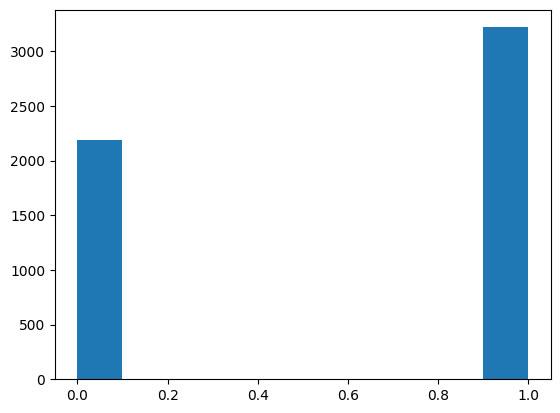

In [32]:
#check the shape histogram
plt.hist(y_pred)

(array([ 8921.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 12705.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

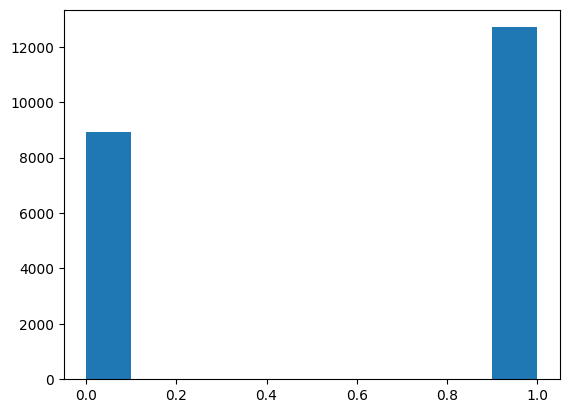

In [33]:
#check the shape y histogram
plt.hist(y_MCF_DS)

In [35]:
#save the predictions "C:\\Users\\camer\\Desktop\\class stuff\\Semester 4\\ai lab\\DropSeq\
np.savetxt("C:\\Users\\camer\\Desktop\\class stuff\\Semester 4\\ai lab\\DropSeq\\MCF7_Filtered_Normalised_3000_Data_test_predictions.txt", y_pred, fmt='%s')

In [69]:
#Ensemble: of Logistic Regression, SVM, and Random Forest with their best parameters:
#'Logistic Regression': {'C': 0.1, 'penalty': 'l2'}, 'Random Forest': {'max_depth': 100, 'n_estimators': 200}, 'SVM': {'C': 10, 'kernel': 'rbf'}
#HCC/DropSeq
lr = LogisticRegression(C=0.1, penalty='l2', solver='liblinear', random_state=42)
rf = RandomForestClassifier(max_depth=100, n_estimators=200, random_state=42)
svm = SVC(C=10, kernel='rbf', probability=True, random_state=42)
ensemble = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('svm', svm)], voting='soft')
ensemble.fit(HCC_DS, y_HCC_DS)
y_pred = ensemble.predict(HCC_DS_test)

C:\Users\camer\PycharmProjects\AI-Lab\venv\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\camer\PycharmProjects\AI-Lab\venv\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [70]:
y_pred

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [71]:
#check none are missing
np.isnan(y_pred).sum()

0

In [72]:
#save the predictions "C:\\Users\\camer\\Desktop\\class stuff\\Semester 4\\ai lab\\DropSeq\
np.savetxt("C:\\Users\\camer\\Desktop\\class stuff\\Semester 4\\ai lab\\DropSeq\\HCC1806_Filtered_Normalised_3000_Data_test_predictions.txt", y_pred, fmt='%s')

In [73]:
#MCF/SmartSeq
rf = RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)
rf.fit(MCF_SS, y_MCF_SS)
y_pred = rf.predict(MCF_SS_test)

C:\Users\camer\PycharmProjects\AI-Lab\venv\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [74]:
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1],
      dtype=int64)

In [75]:
#check none are missing
np.isnan(y_pred).sum()

0

In [76]:
#save the predictions "C:\\Users\\camer\\Desktop\\class stuff\\Semester 4\\ai lab\\SmartSeq\
np.savetxt("C:\\Users\\camer\\Desktop\\class stuff\\Semester 4\\ai lab\\SmartSeq\\MCF7_SmartS_Filtered_Normalised_3000_Data_test_predictions.txt", y_pred, fmt='%s')

In [77]:
#HCC/SmartSeq
rf = RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)
rf.fit(HCC_SS, y_HCC_SS)
y_pred = rf.predict(HCC_SS_test)

C:\Users\camer\PycharmProjects\AI-Lab\venv\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [78]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1], dtype=int64)

In [79]:
#check none are missing
np.isnan(y_pred).sum()

0

In [80]:
#save the predictions "C:\\Users\\camer\\Desktop\\class stuff\\Semester 4\\ai lab\\SmartSeq\
np.savetxt("C:\\Users\\camer\\Desktop\\class stuff\\Semester 4\\ai lab\\SmartSeq\\HCC1806_SmartS_Filtered_Normalised_3000_Data_test_predictions.txt", y_pred, fmt='%s')